In [1]:
import re
import os
import time
import csv
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import myUtils

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
root_data_path = '../data/'
feature_path = root_data_path + '2_features/'
src_data_path = root_data_path + '1_processed_data/2_smoothed_data/'
operation_stage = 'arcing'
operation_ftr_path = feature_path + operation_stage + '/'
machine_files = os.listdir(operation_ftr_path)
print(machine_files)

['1.csv', '10.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv']


In [4]:
machine_ftr_dict_file = feature_path + 'machine_ftr_dict.pkl'
if os.path.exists(machine_ftr_dict_file):
    machine_ftr_dict = myUtils.loadPickleFile(machine_ftr_dict_file)
    print('machine_ftr_dict_file is loaded')
else:
    machine_ftr_dict = {}
    for i, tmp_file in enumerate(machine_files):
        machine_id = re.match('(.*).csv', tmp_file).group(1)
        machine_ftr_dict[machine_id] = pd.read_csv(operation_ftr_path + tmp_file)
    myUtils.dumpPickleFile(machine_ftr_dict, machine_ftr_dict_file)
    print('machine_ftr_dict_file is created')

machine_ftr_dict_file is loaded


In [5]:
machine_ids = list(machine_ftr_dict.keys())
machine_ids

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
en_col = ['energy','duration']
cn_col = ['能量','时长']

## 1. 燃弧相角

In [6]:

machine_id = '4'
operation_data_list = myUtils.loadPickleFile(src_data_path + machine_id + '.pkl')

In [15]:
machine_ids

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [16]:
machine_ftr_dict = {}
for machine_id in machine_ids:
    machine_ftr_dict[machine_id] = pd.read_csv(operation_ftr_path + machine_id+'.csv')

## 2. 燃弧能量分布

#### 燃弧能量分布的变化情况

In [8]:
res_path = '../res/良信项目进展_东南_20201118/'
tmp_res_path = res_path + '燃弧能量分布/'

In [10]:
import seaborn as sns
idx_col = 1
fig_path = tmp_res_path + '燃弧' + cn_col[idx_col] + '/'
myUtils.makedirs(fig_path)
#machine_ids = [4,3, 1, 9, 8, 10, 2, 6,5,7]
for machine_id in machine_ids:
    ftr_df = pd.read_csv(operation_ftr_path + machine_id + '.csv')
    op_range = list(range(50, len(ftr_df), 100)) + [len(ftr_df)]
    
    n_hplots = 4
    plt.figure(figsize=(20, (int(len(op_range) / n_hplots) + 1) * 4))
    title = '设备'+ machine_id +'累计若干次操作后的燃弧'+ cn_col[idx_col]+'分布情况'
    plt.suptitle(title, fontsize=16, y = 1)
    for i, op_cnt in enumerate(op_range):
        plt.subplot(int(len(op_range)/n_hplots) + 1,n_hplots, i + 1)
        plt.tight_layout(pad=5) 
        sns.distplot(ftr_df['A_arcing_' + en_col[idx_col]][:op_cnt])
        plt.xlabel('燃弧' + cn_col[idx_col])
        plt.ylabel('出现频率')
        plt.title('累计操作次数：' + str(op_cnt))
        #
        if idx_col == 1:
            plt.xlim([-30,200])
        else:
            plt.xlim([-5e2,2e3])
            plt.ylim([0, 0.003])
    plt.savefig(fig_path + title+ '.png', dpi=100,bbox_inches ='tight')

../res/良信项目进展_东南_20201118/燃弧能量分布/燃弧能量/ successfully created.
Error in callback <function flush_figures at 0x000001E49181BEA0> (for post_execute):


KeyboardInterrupt: 

../data/2_features/分布/燃弧能量/ already exist.


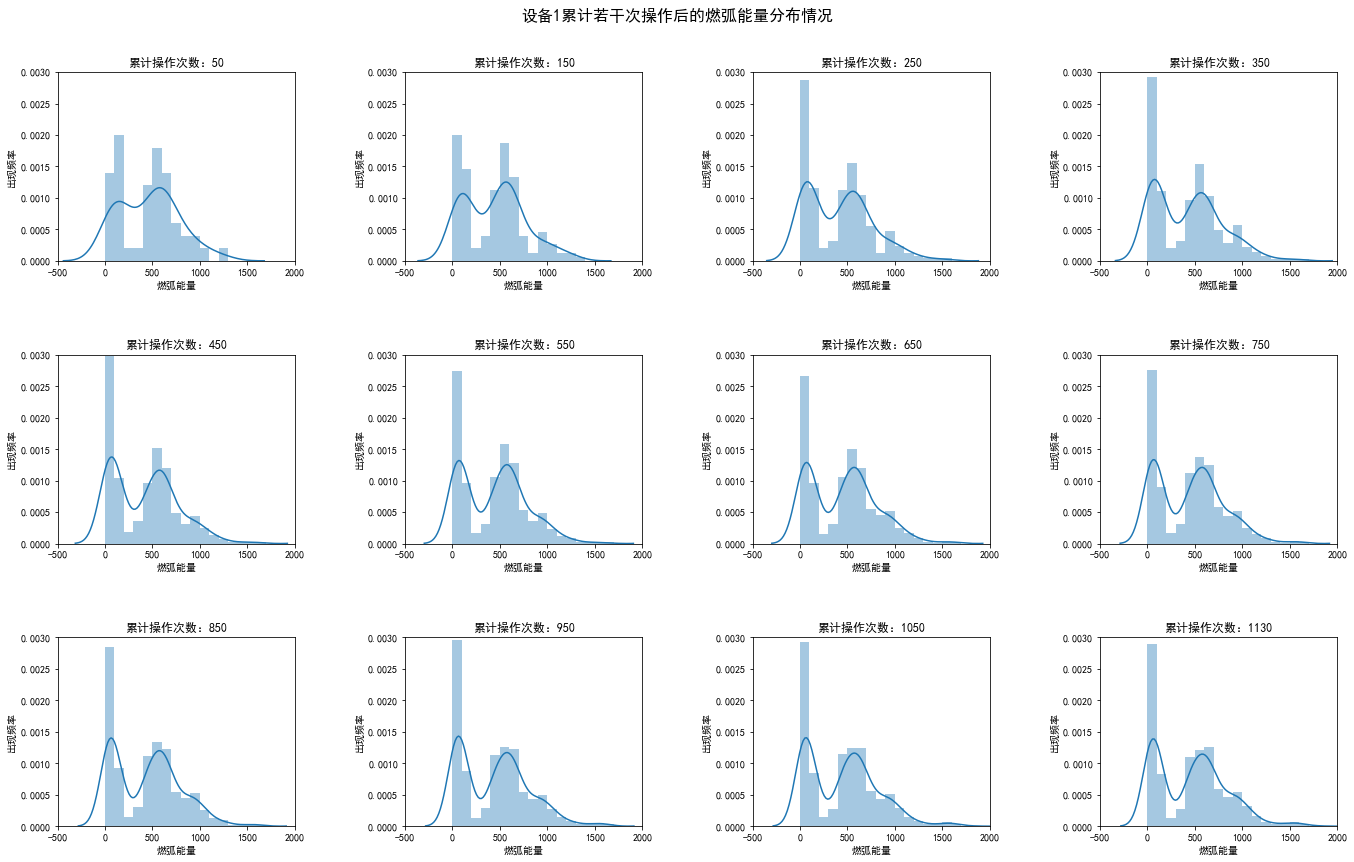

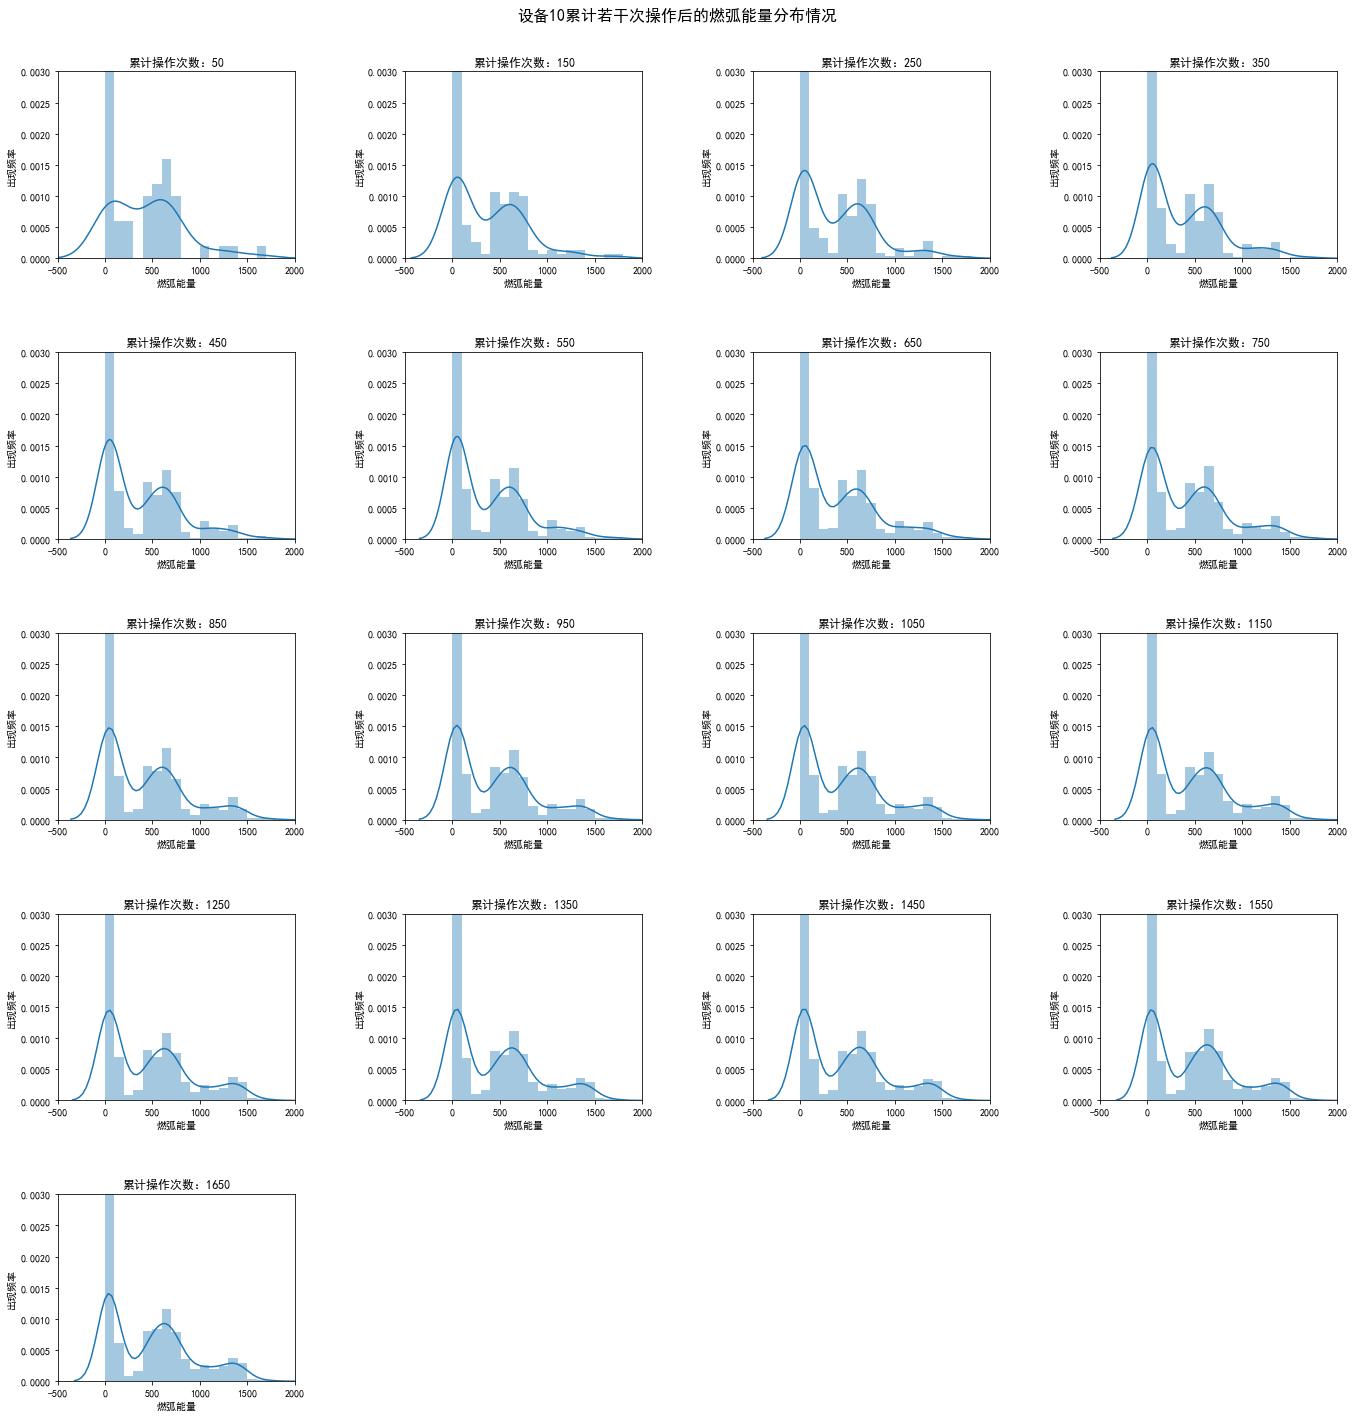

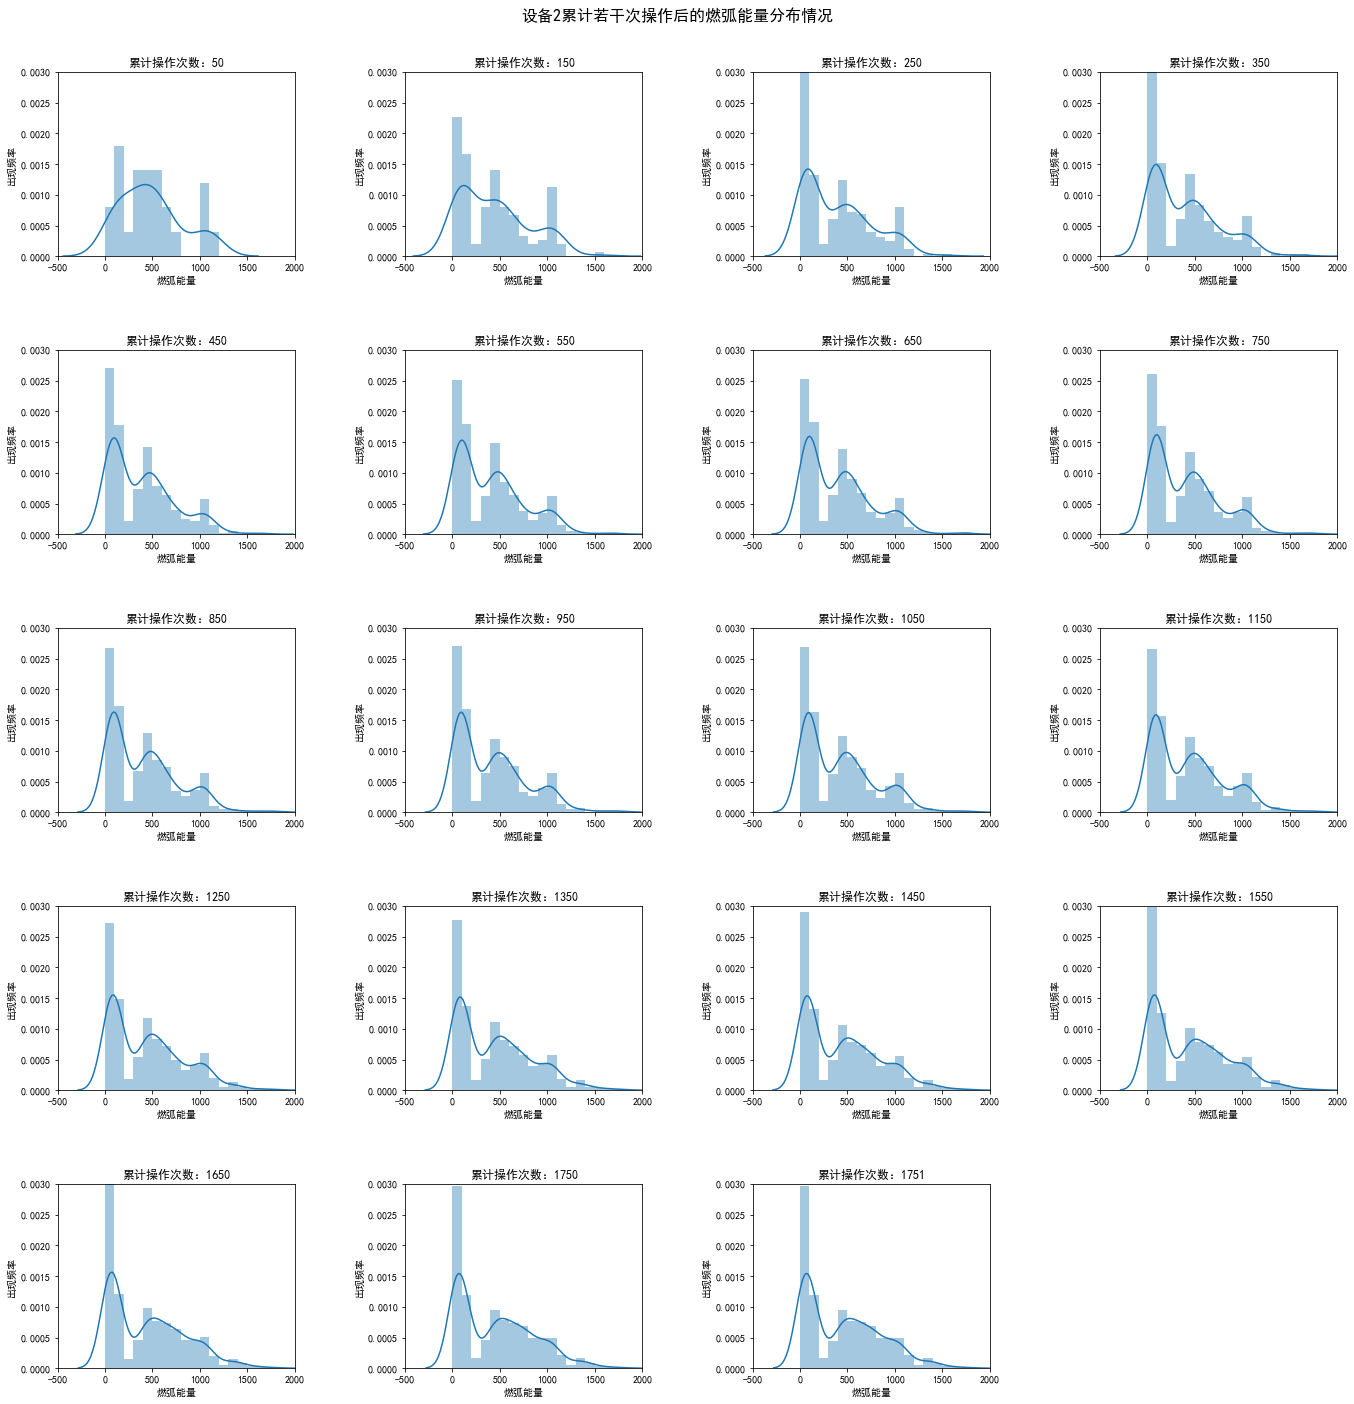

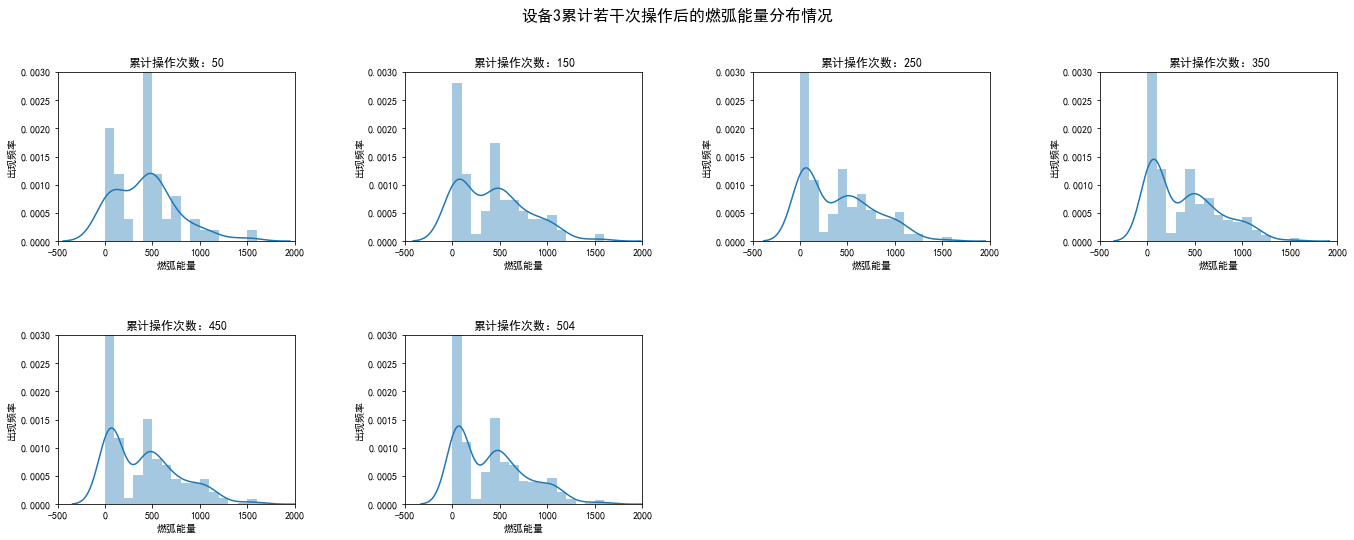

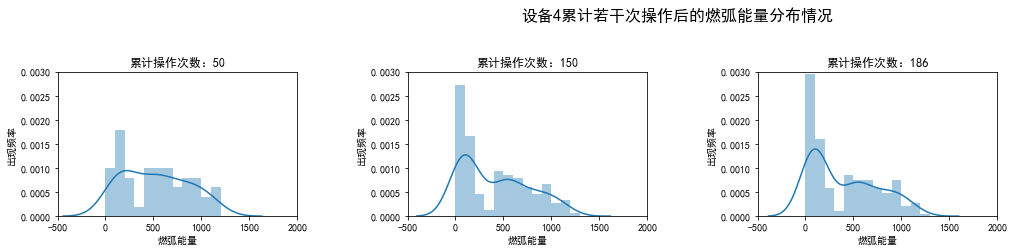

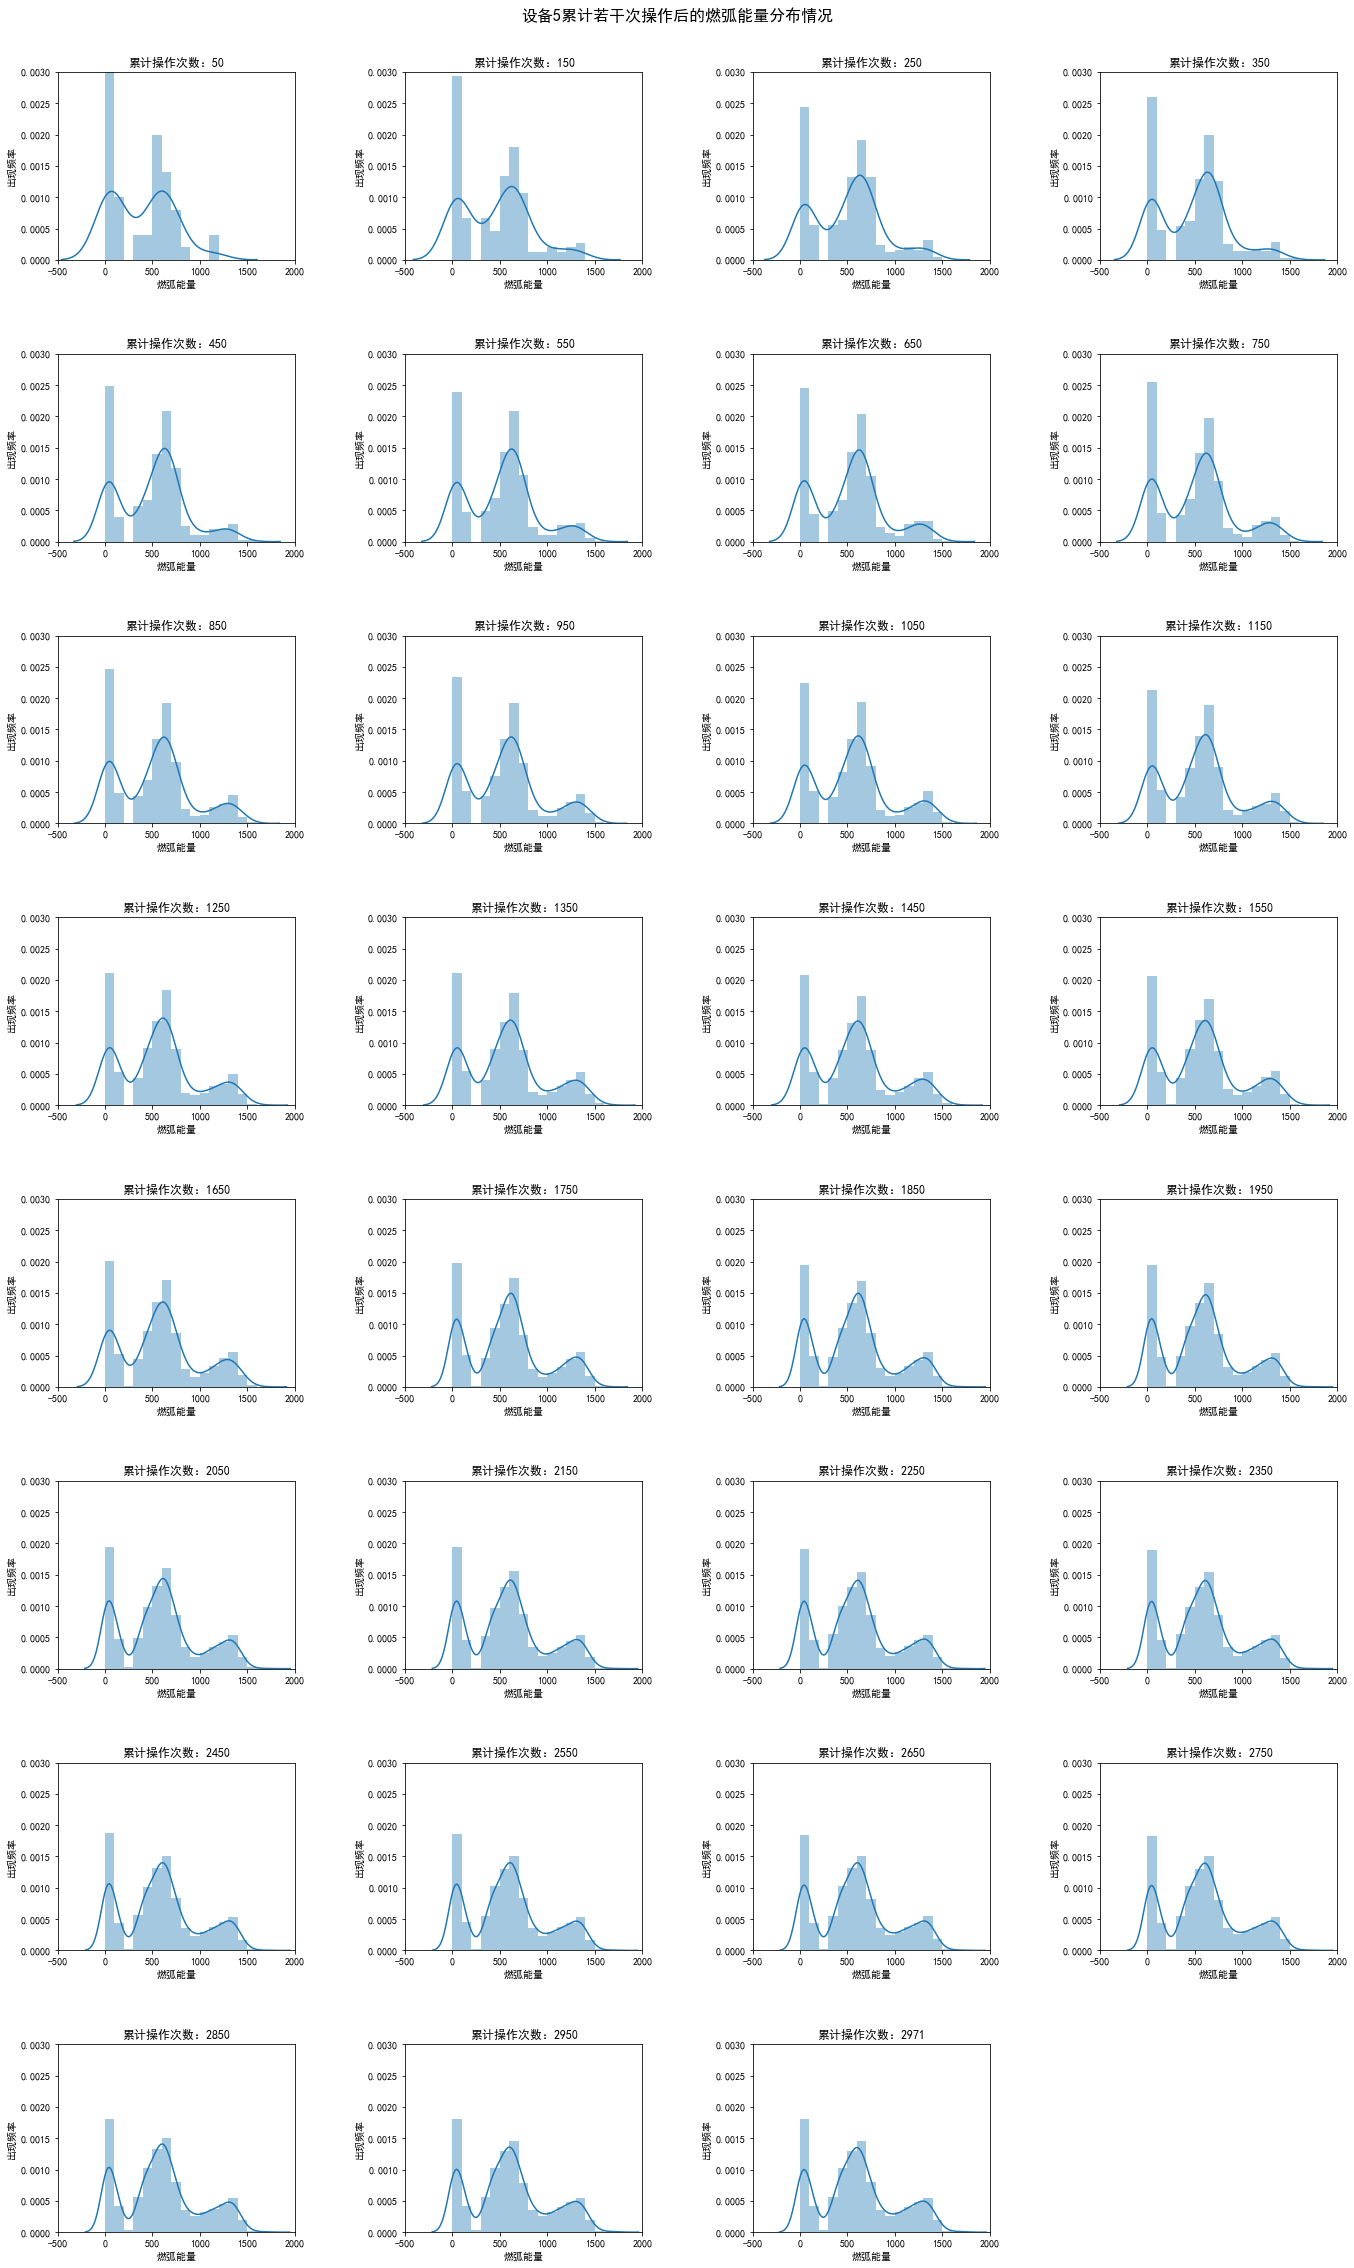

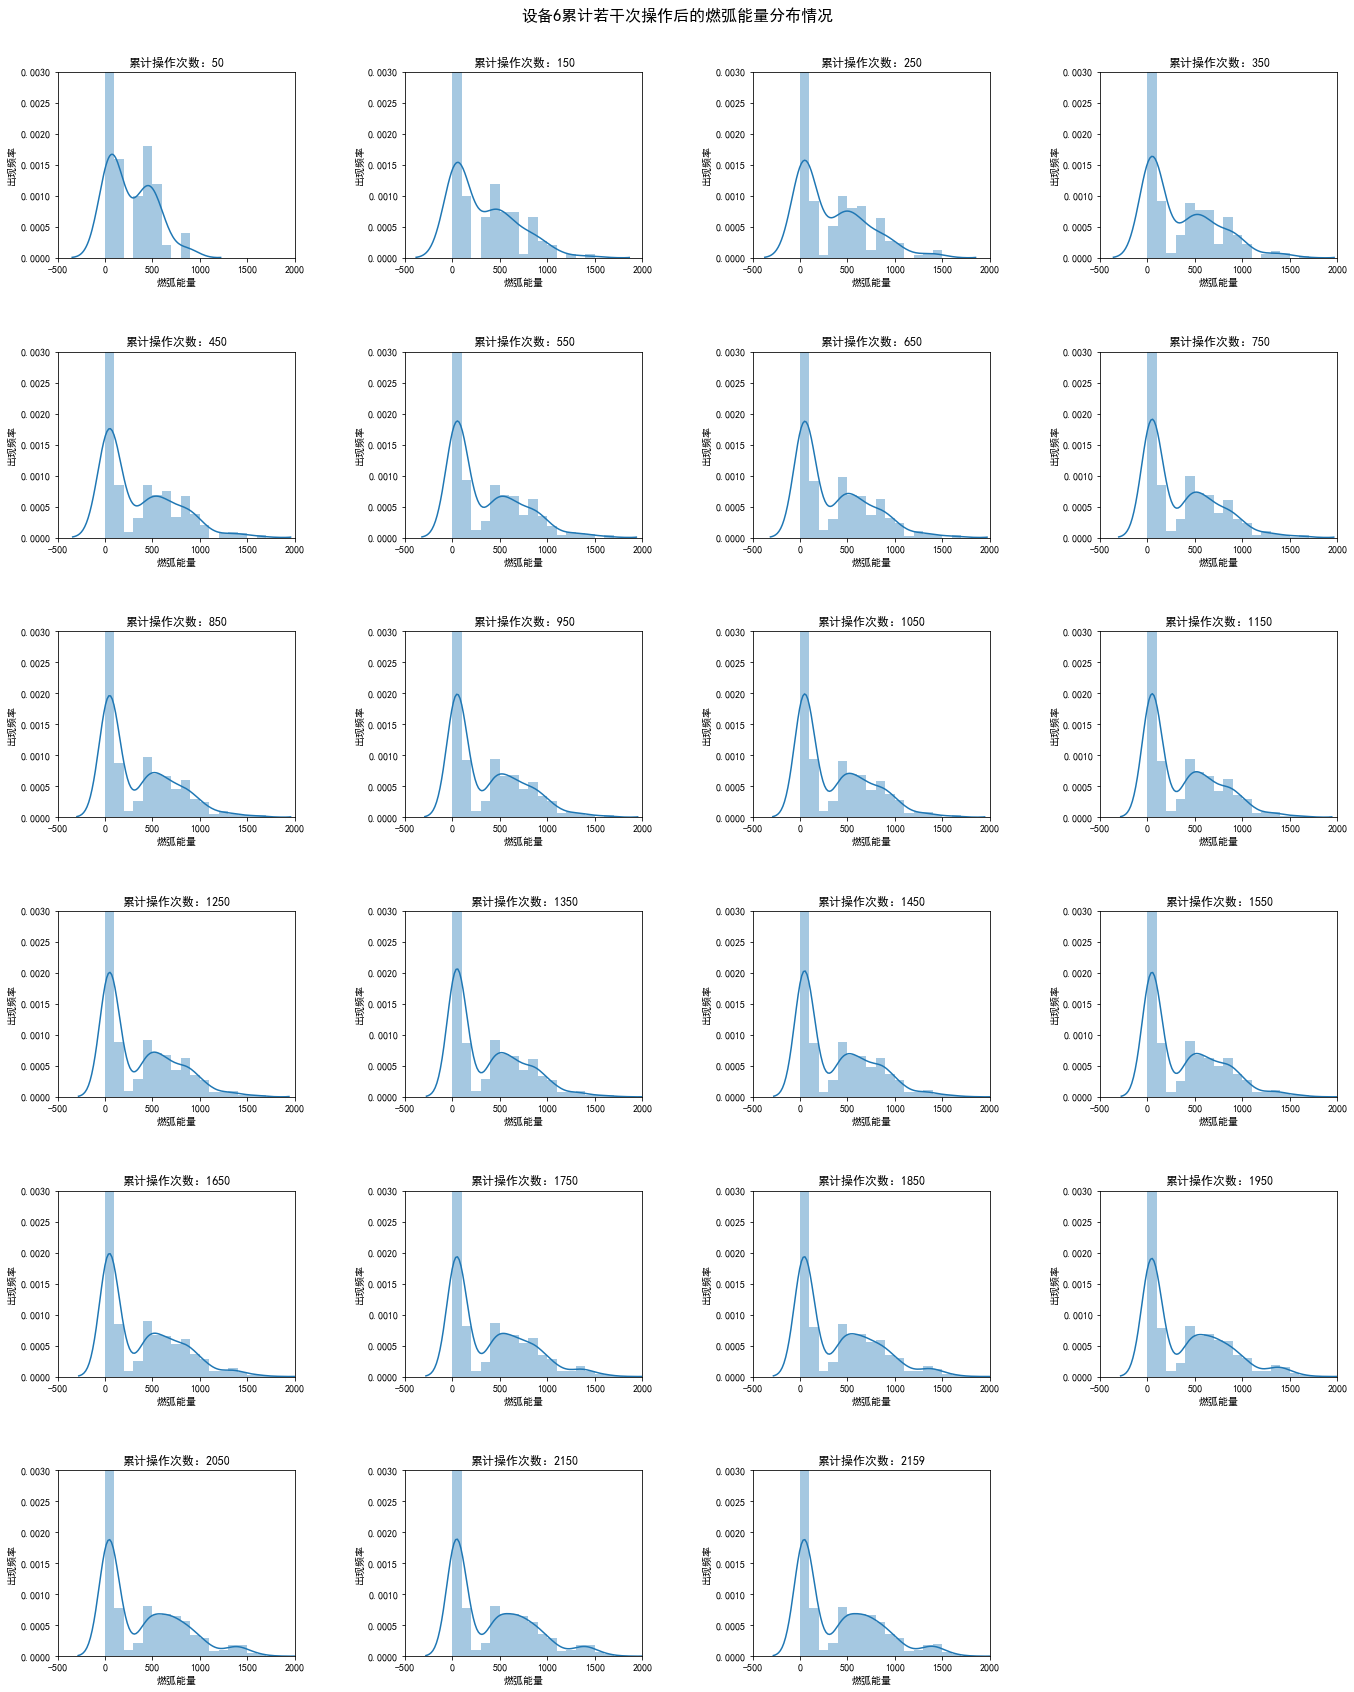

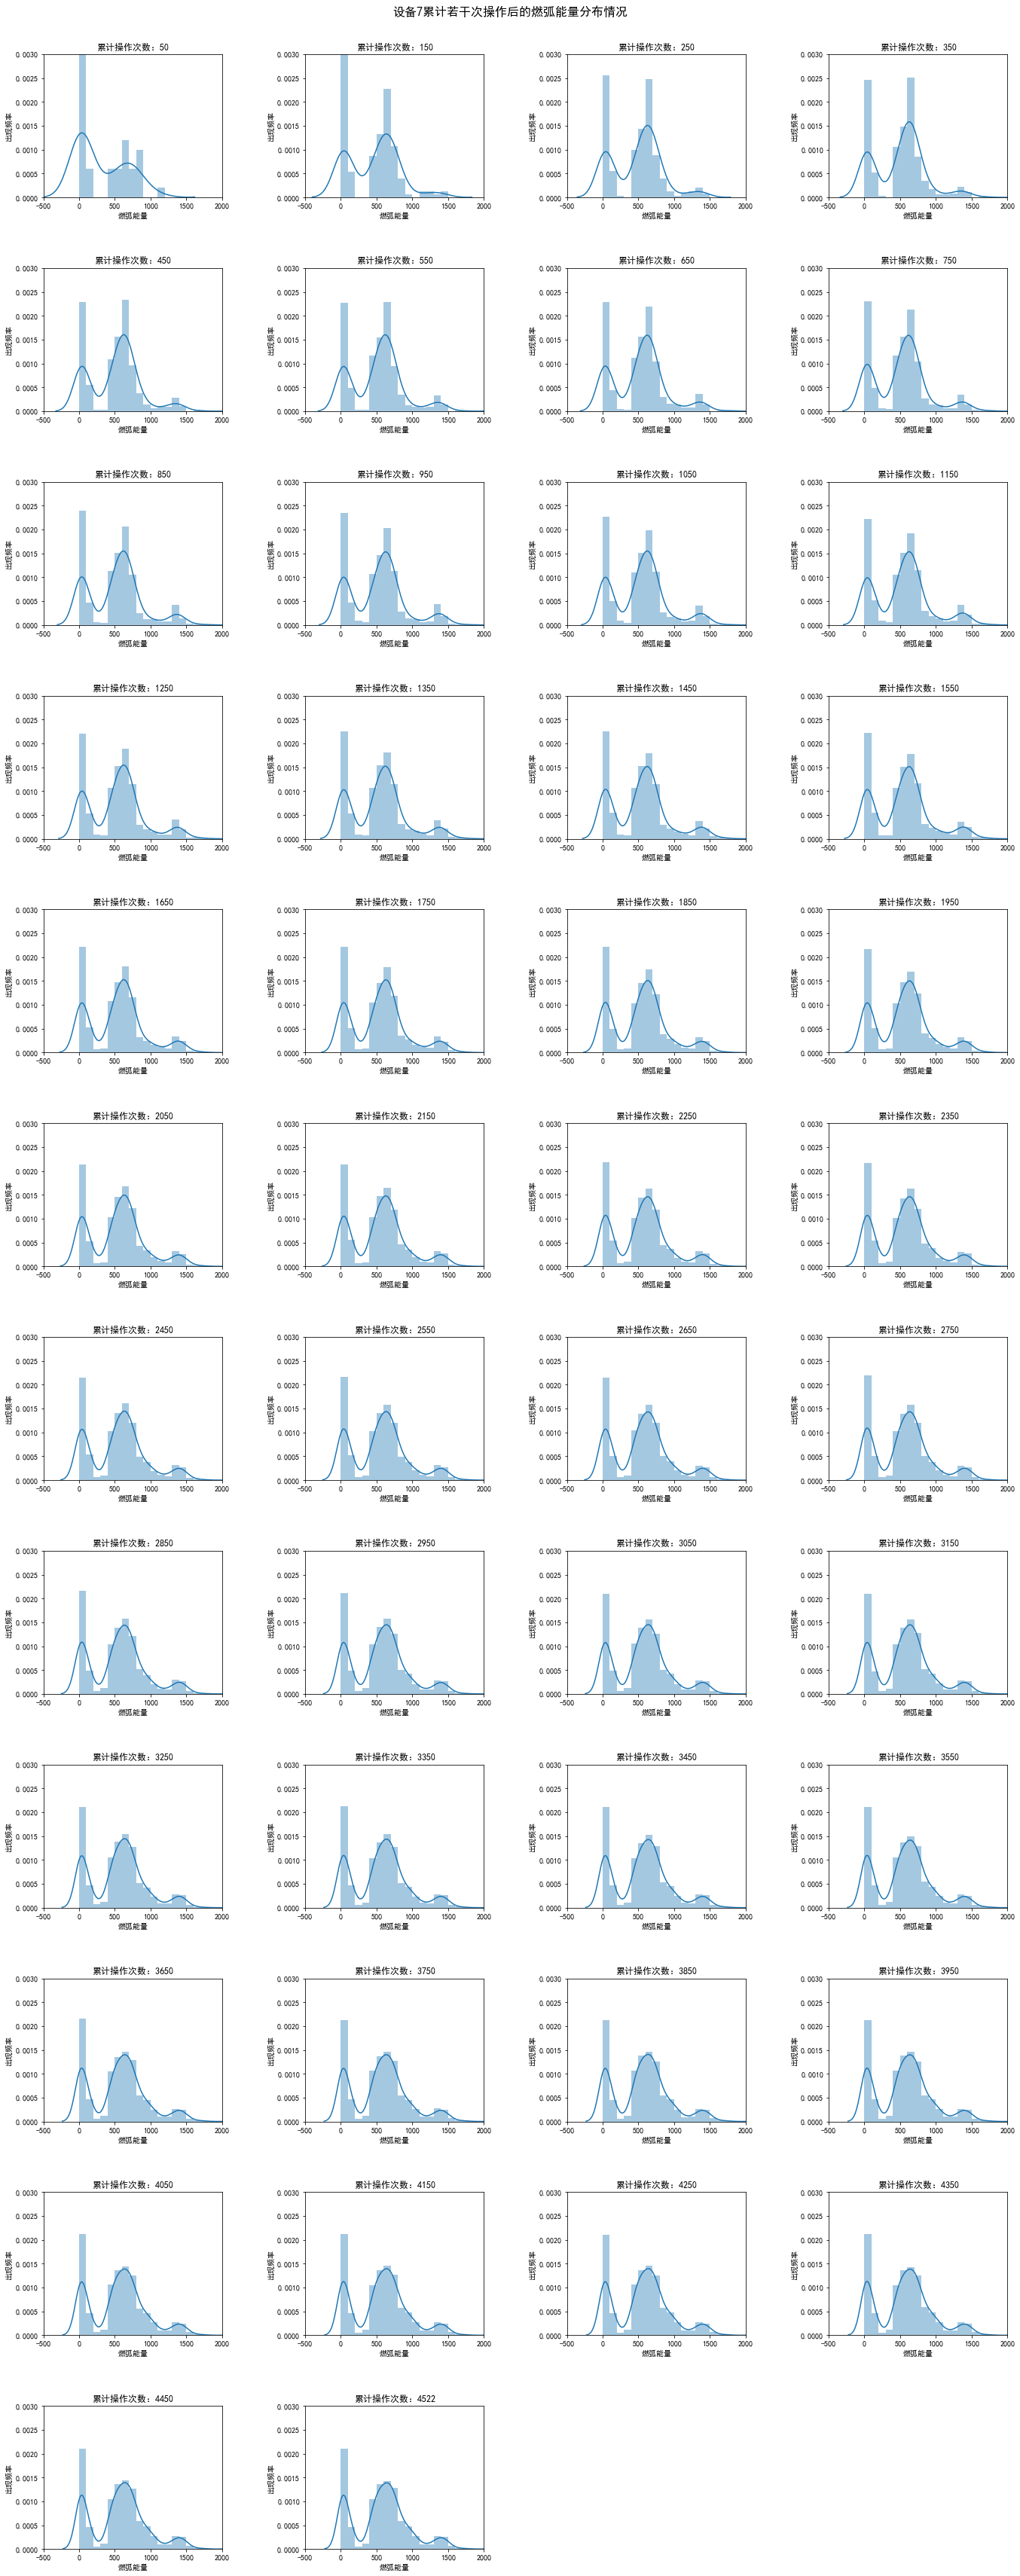

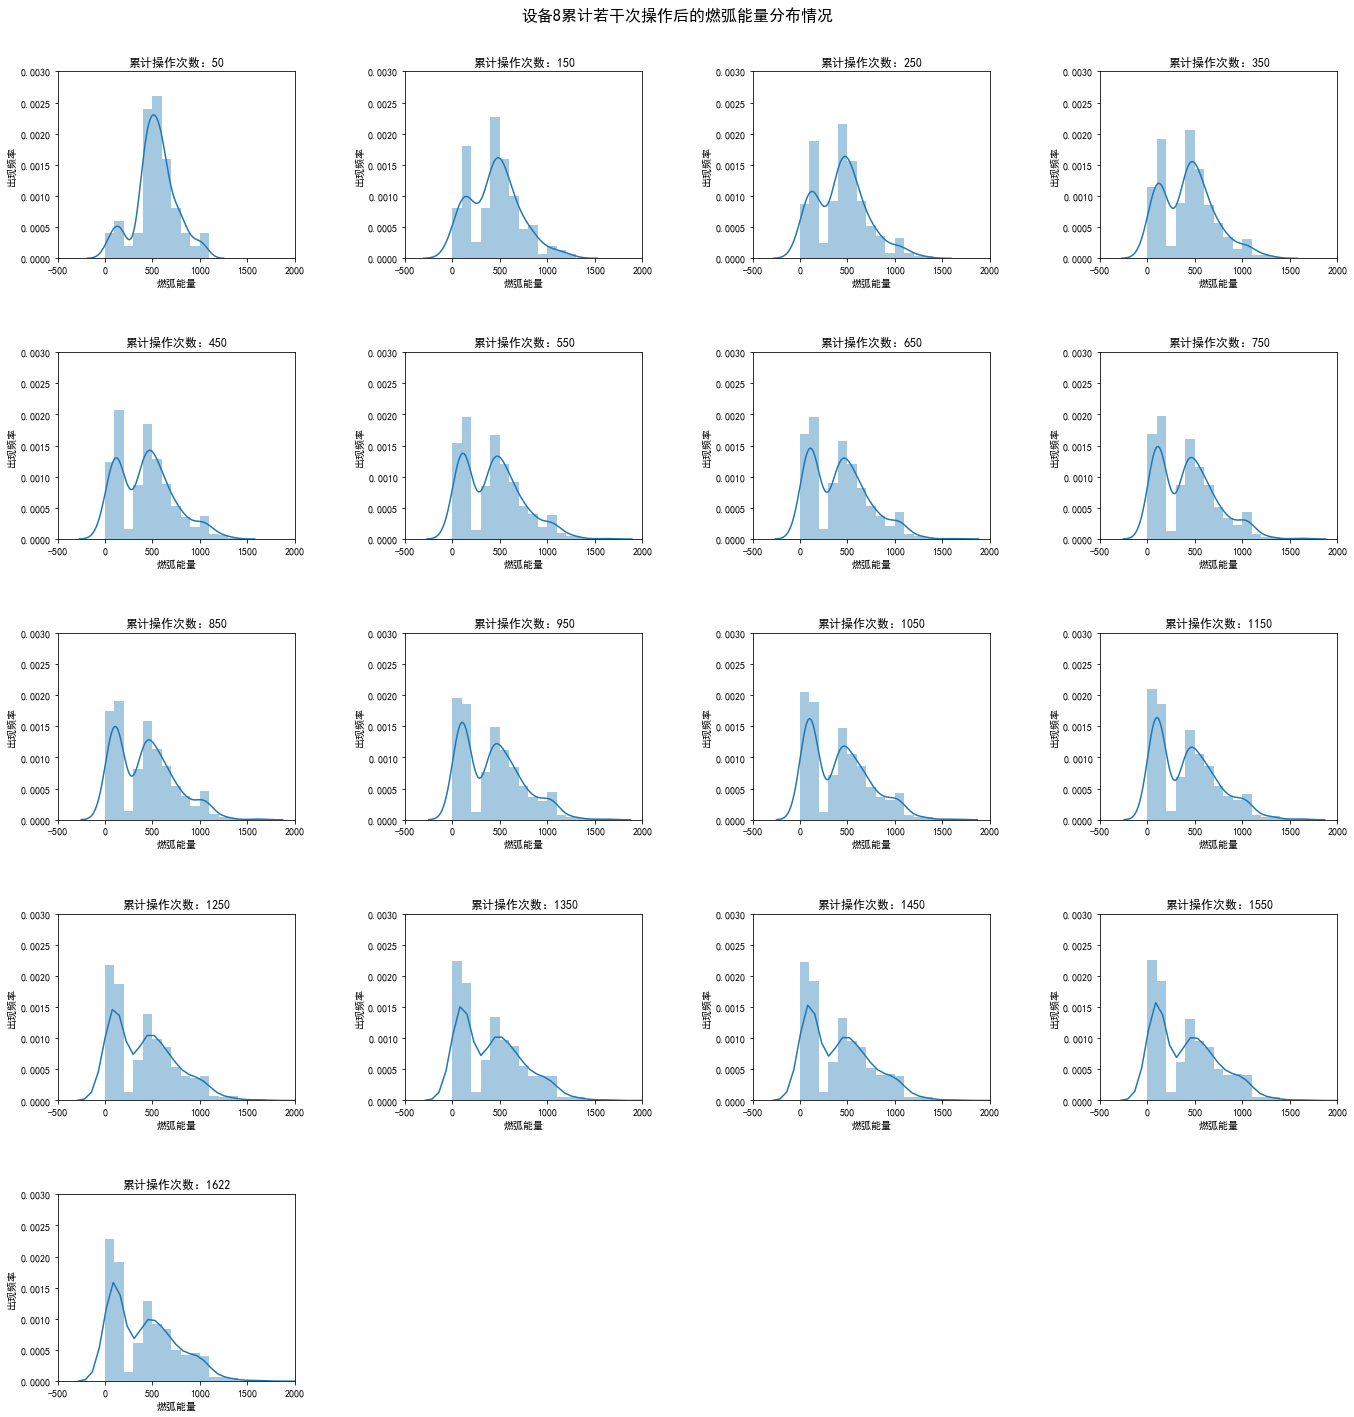

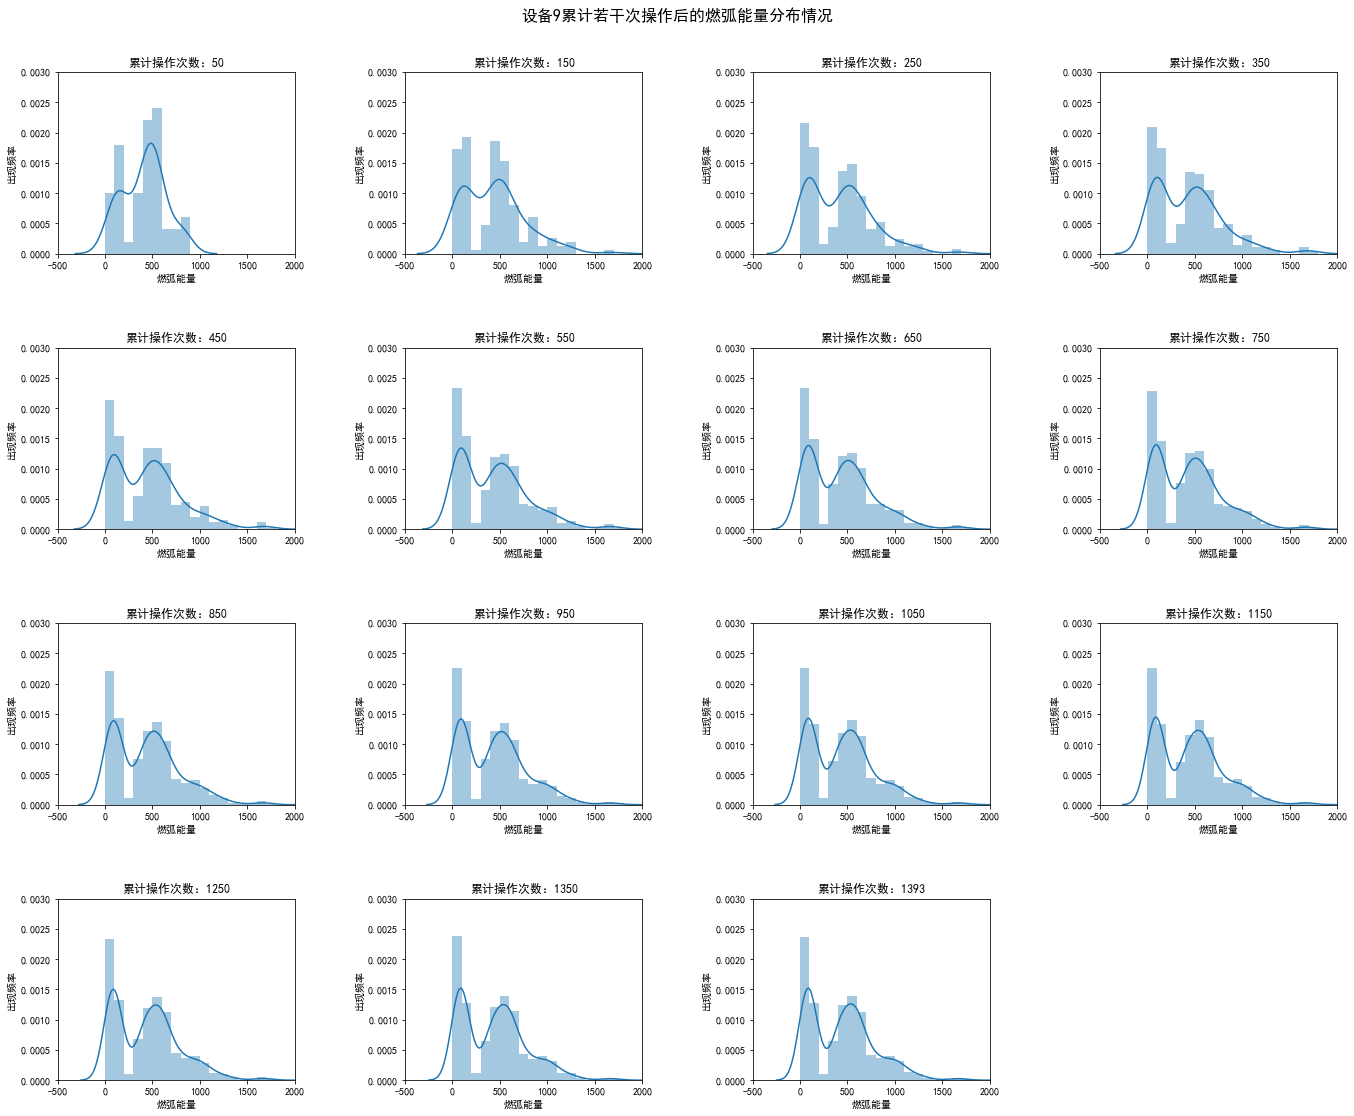

In [12]:
import seaborn as sns
idx_col = 0
energy_range = np.arange(0, 2e3 + 1, 1e2)
fig_path = tmp_res_path+'/燃弧' + cn_col[idx_col] + '/'
myUtils.makedirs(fig_path)
#machine_ids = [4,3, 1, 9, 8, 10, 2, 6,5,7]
for machine_id in machine_ids:
    ftr_df = pd.read_csv(operation_ftr_path + machine_id + '.csv')
    op_range = list(range(50, len(ftr_df), 100)) + [len(ftr_df)]
    
    n_hplots = 4
    fig = plt.figure(figsize=(20, (int(len(op_range) / n_hplots) + 1) * 4))
    title = '设备'+ machine_id +'累计若干次操作后的燃弧'+ cn_col[idx_col]+'分布情况'
    plt.suptitle(title, fontsize=16, y = 1)
    for i, op_cnt in enumerate(op_range):
        plt.subplot(int(len(op_range)/n_hplots) + 1,n_hplots, i + 1)
        plt.tight_layout(pad=5) 
        sns.distplot(ftr_df['A_arcing_' + en_col[idx_col]][:op_cnt], bins = energy_range)
        plt.xlabel('燃弧' + cn_col[idx_col])
        plt.ylabel('出现频率')
        plt.title('累计操作次数：' + str(op_cnt))
        #
        if idx_col == 1:
            plt.xlim([-30,200])
        else:
            plt.xlim([-5e2,2e3])
            plt.ylim([0, 0.003])
    plt.savefig(fig_path + title+ '.png', dpi=100,bbox_inches ='tight')
    plt.close(fig)

In [11]:
energy_gap = 1e2
energy_bar = []
for range_idx in range(len(energy_range) - 1):
    energy_bar += [int((energy_range[range_idx + 1] + energy_range[range_idx]) / 2)]
print(energy_bar)

energy_occ_range = ['%.0f-%.0f'%((energy_range[i]/ energy_gap), (energy_range[i + 1]/ energy_gap)) for i in range(len(energy_range) - 1)]
print(energy_occ_range)

energy_occ_range_cnt = ['cnt_' + tmp_range for tmp_range in energy_occ_range]
energy_occ_range_frq = ['frq_' + tmp_range for tmp_range in energy_occ_range]
energy_occ_cols = energy_occ_range_cnt + energy_occ_range_frq
print(energy_occ_cols)

[50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950]
['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20']
['cnt_0-1', 'cnt_1-2', 'cnt_2-3', 'cnt_3-4', 'cnt_4-5', 'cnt_5-6', 'cnt_6-7', 'cnt_7-8', 'cnt_8-9', 'cnt_9-10', 'cnt_10-11', 'cnt_11-12', 'cnt_12-13', 'cnt_13-14', 'cnt_14-15', 'cnt_15-16', 'cnt_16-17', 'cnt_17-18', 'cnt_18-19', 'cnt_19-20', 'frq_0-1', 'frq_1-2', 'frq_2-3', 'frq_3-4', 'frq_4-5', 'frq_5-6', 'frq_6-7', 'frq_7-8', 'frq_8-9', 'frq_9-10', 'frq_10-11', 'frq_11-12', 'frq_12-13', 'frq_13-14', 'frq_14-15', 'frq_15-16', 'frq_16-17', 'frq_17-18', 'frq_18-19', 'frq_19-20']


In [ ]:
energy_occ_dict_file = feature_path + 'energy_occ_dict.pkl'
if os.path.exists(energy_occ_dict_file):
    energy_occ_dict = myUtils.loadPickleFile(energy_occ_dict_file)
    print('energy_occ_dict_file is loaded')
else:
    energy_occ_dict = {}
    for machine_id in machine_ids:#list(machine_ftr_dict.keys()):
        print(machine_id)
        machine_ftr_df = machine_ftr_dict[machine_id]
        energy_occ_df = pd.DataFrame()
        for operation_idx in range(1, len(machine_ftr_df) + 1):
            energy_occ = []
            for range_idx in range(len(energy_range) - 1):
                energy_occ += [machine_ftr_df[:operation_idx]['A_arcing_energy'][(machine_ftr_df['A_arcing_energy'] >= energy_range[range_idx]) & (machine_ftr_df['A_arcing_energy'] < energy_range[range_idx + 1])].count()]
            occ_frequency = energy_occ / (np.sum(energy_occ) + 0.0001)
            energy_occ += list(occ_frequency)
            energy_occ_df = energy_occ_df.append(pd.DataFrame([energy_occ], columns = energy_occ_cols), ignore_index = True)
        energy_occ_dict[machine_id] = energy_occ_df
    myUtils.dumpPickleFile(energy_occ_dict, energy_occ_dict_file)
    print('energy_occ_dict_file is created')

In [13]:
energy_occ_dict = {}
for machine_id in machine_ids:#list(machine_ftr_dict.keys()):
    print(machine_id)
    machine_ftr_df = machine_ftr_dict[machine_id]
    energy_occ_df = pd.DataFrame()
    for operation_idx in range(1, len(machine_ftr_df) + 1):
        energy_occ = []
        for range_idx in range(len(energy_range) - 1):
            energy_occ += [machine_ftr_df[:operation_idx]['A_arcing_energy'][(machine_ftr_df['A_arcing_energy'] >= energy_range[range_idx]) & (machine_ftr_df['A_arcing_energy'] < energy_range[range_idx + 1])].count()]
        occ_frequency = energy_occ / (np.sum(energy_occ) + 0.0001)
        energy_occ += list(occ_frequency)
        energy_occ_df = energy_occ_df.append(pd.DataFrame([energy_occ], columns = energy_occ_cols), ignore_index = True)
    energy_occ_dict[machine_id] = energy_occ_df

1
10
2
3
4
5
6
7
8
9


In [14]:
pkl_file = open(feature_path + 'energy_occ_dict.pkl', 'wb')
pickle.dump(energy_occ_dict, pkl_file)
pkl_file.close()

In [15]:
machine_tot_operations_tup_list = []
for machine_id in list(machine_ftr_dict.keys()):
    machine_tot_operations_tup_list += [(machine_id, len(machine_ftr_dict[machine_id]))]
machine_tot_operations_tup_list.sort(key=lambda x : x[1])
machine_tot_operations_tup_list

[('4', 186),
 ('3', 504),
 ('1', 1130),
 ('9', 1393),
 ('8', 1622),
 ('10', 1650),
 ('2', 1751),
 ('6', 2159),
 ('5', 2971),
 ('7', 4522)]

In [31]:
energy_occ_dict = myUtils.loadPickleFile(feature_path + 'energy_occ_dict.pkl')

In [32]:
energy_occ_dict.keys()

dict_keys(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'])

In [65]:
machine_id_list = ['4','3','1','9','8','10','2','6','5','7']

In [200]:
distribution_fig_path = feature_path + 'distribution_fig/'
myUtils.makedirs(distribution_fig_path)

../data/2_features/distribution_fig/ successfully created.


##### 能量值在某一区间范围内的操作出现频率的变化情况（累计）

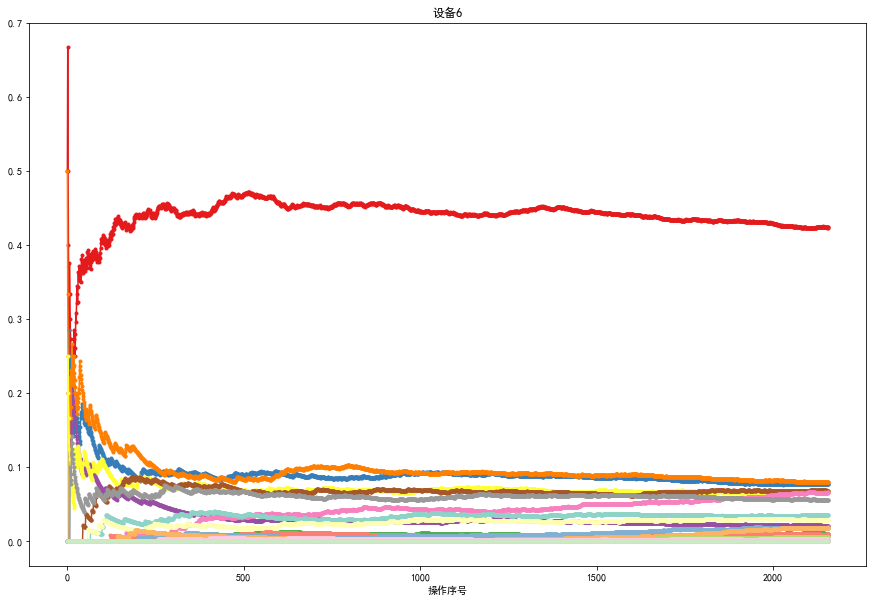

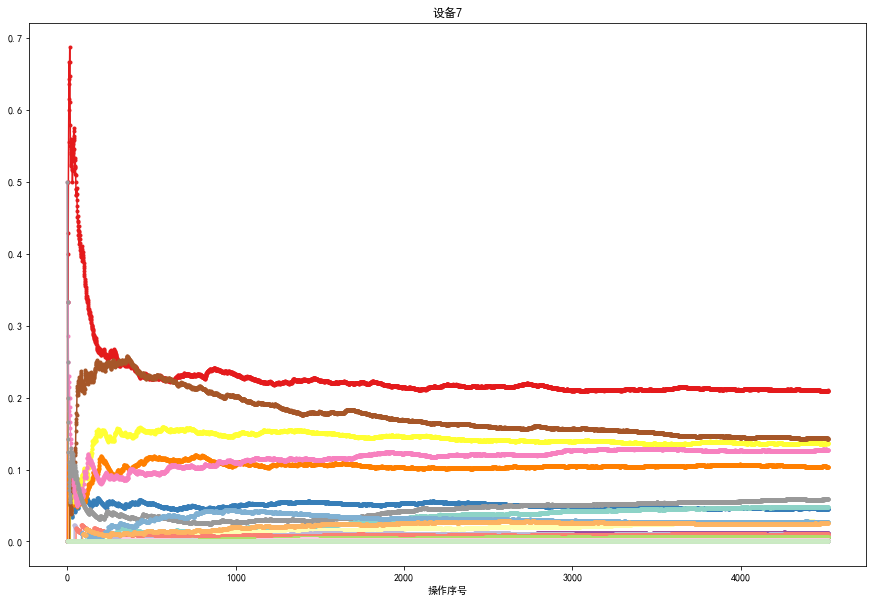

In [23]:
for machine_id in [str(i) for i in range(6, 8)]:#['1','2','3','4','5']:
    fig = plt.figure(figsize= (15,10))
    machine_ftr_df = machine_ftr_dict[machine_id]
    energy_occ_df = energy_occ_dict[machine_id]
    #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
    machine_range = np.arange(1, len(machine_ftr_df))
    for ci, z in enumerate(energy_occ_range_frq):
        ys = energy_occ_df.loc[machine_range][z].tolist()
        #print(z, ys, len(ys))
        n_colors = 9
        if ci < n_colors:
            tmp_c = plt.cm.Set1(ci)
        else:
            tmp_c = plt.cm.Set3(ci - n_colors) 
        plt.plot(ys,c = tmp_c, marker = '.')
    plt.title('设备' + machine_id )
    plt.xlabel('操作序号')
    #plt.savefig('../data/2_features/res/' + machine_id + '.png', dpi=100,bbox_inches ='tight')
    #plt.close(fig)
    #fig.legend(energy_occ_range_type, loc = 'upper center', ncol = int(len(energy_occ_range_type)/2), bbox_to_anchor=(0.35,1, 0.3, 0))

In [26]:
tmp_res_path = res_path + '燃弧能量分布/'

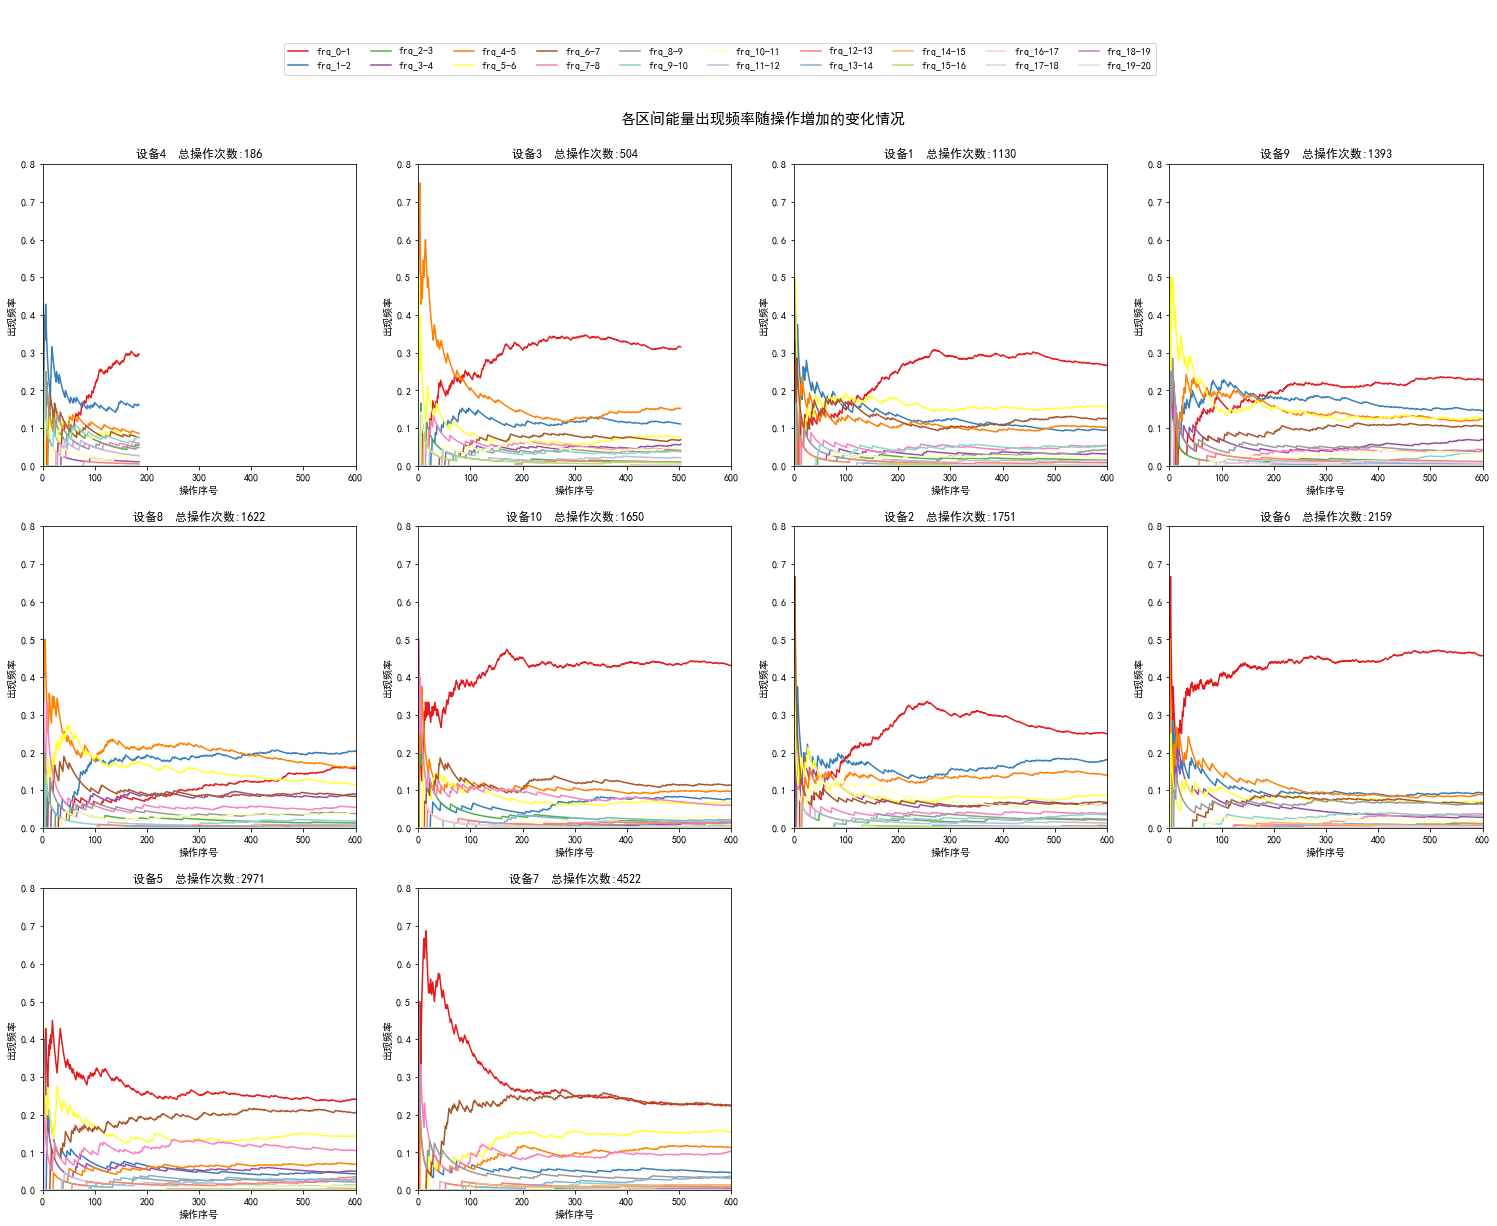

In [41]:
fig = plt.figure(figsize= (20,15))
plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.2,wspace=0.2)
title = '各区间能量出现频率随操作增加的变化情况'
fig.suptitle(title, y = 1,fontsize= 15)
for i, machine_tup in enumerate(machine_tot_operations_tup_list):
    machine_id, machine_tot_operations = machine_tup
    ax = fig.add_subplot(3,4, i + 1)

    machine_ftr_df = machine_ftr_dict[machine_id]
    energy_occ_df = energy_occ_dict[machine_id]
    #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
    machine_range = np.arange(1, len(machine_ftr_df))
    for ci, z in enumerate(energy_occ_range_frq):
        ys = energy_occ_df.loc[machine_range][z].tolist()
        n_colors = 9
        if ci < n_colors:
            tmp_c = plt.cm.Set1(ci)
        else:
            tmp_c = plt.cm.Set3(ci - n_colors) 
        ax.plot(machine_range, ys, c = tmp_c)
    ax.set_title('设备' + machine_id + '  总操作次数:' + str(machine_tot_operations))
    ax.set_xlabel('操作序号')
    ax.set_ylabel('出现频率')
    plt.ylim([0, 0.8])
    plt.xlim([0,600])
fig.legend(energy_occ_range_frq, loc = 'upper center', ncol = int(len(energy_occ_range_frq)/2), bbox_to_anchor=(0.35,1.1, 0.3, 0))#bbox_to_anchor=(0.45, 0.78),borderaxespad=1)
plt.savefig(tmp_res_path + title +'(3x4限定范围).png', dpi = 100, bbox_inches ='tight')

##### 能量值在某一区间范围内的操作出现频率的变化情况（窗口）

In [ ]:
res_path = '../res/良信项目进展_东南_20201118/'

In [22]:

for machine_id in  [str(i) for i in range(1,8)]:
    fig = plt.figure(figsize= (20,10))
    ax = fig.add_subplot(1,1,1)
    win_size= 200
    machine_ftr_df = machine_ftr_dict[machine_id]
    energy_occ_df = energy_occ_dict[machine_id]
    #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
    machine_range = np.arange(1 + win_size, len(machine_ftr_df))
    for ci, z in enumerate(energy_occ_range_cnt):
        ys = (np.array(energy_occ_df.loc[machine_range][z]) - np.array(energy_occ_df.loc[machine_range - win_size][z]) ) / win_size
        #print(z, ys, len(ys))
        n_colors = 9
        if ci < n_colors:
            tmp_c = plt.cm.Set1(ci)
        else:
            tmp_c = plt.cm.Set3(ci - n_colors) 
        ax.plot(ys,c = tmp_c, marker = '.')
    ax.set_title('设备' + machine_id )
    ax.set_xlabel('操作序号')
    #fig.legend(energy_occ_range_type, loc = 'upper center', ncol = int(len(energy_occ_range_type)/2), bbox_to_anchor=(0.35,1, 0.3, 0))
    plt.savefig(res_path + machine_id + '（窗口）.png', dpi=100,bbox_inches ='tight')
    plt.close(fig)

In [ ]:

for machine_id in  [str(i) for i in range(1,8)]:
    fig = plt.figure(figsize= (20,10))
    ax = fig.add_subplot(1,1,1)
    win_size= 200
    machine_ftr_df = machine_ftr_dict[machine_id]
    energy_occ_df = energy_occ_dict[machine_id]
    #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
    machine_range = np.arange(1 + win_size, len(machine_ftr_df))
    for ci, z in enumerate(energy_occ_range_cnt):
        ys = (np.array(energy_occ_df.loc[machine_range][z]) - np.array(energy_occ_df.loc[machine_range - win_size][z]) ) / win_size
        print(z, ys, len(ys))
        break
        n_colors = 9
        if ci < n_colors:
            tmp_c = plt.cm.Set1(ci)
        else:
            tmp_c = plt.cm.Set3(ci - n_colors) 
        ax.plot(ys,c = tmp_c, marker = '.')
    ax.set_title('设备' + machine_id )
    ax.set_xlabel('操作序号')
    #fig.legend(energy_occ_range_type, loc = 'upper center', ncol = int(len(energy_occ_range_type)/2), bbox_to_anchor=(0.35,1, 0.3, 0))
    plt.savefig('../data/2_features/res/' + machine_id + '（窗口）.png', dpi=100,bbox_inches ='tight')
    plt.close(fig)

In [14]:
def plotDistribution(machine_ftr_dict, energy_occ_dict, energy_occ_range_type, type_name):
    fig = plt.figure(figsize= (20, 35))
    plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.2,wspace=0.1)
    title = '各区间能量' + type_name +'随操作增加的变化情况'
    fig.suptitle(title, y = 1,fontsize= 15)
    for i, machine_tup in enumerate(machine_tot_operations_tup_list):
        machine_id, machine_tot_operations = machine_tup
        ax = fig.add_subplot(5, 2, i + 1)

        machine_ftr_df = machine_ftr_dict[machine_id]
        energy_occ_df = energy_occ_dict[machine_id]
        #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
        machine_range = np.arange(1, len(machine_ftr_df))
        for ci, z in enumerate(energy_occ_range_type):
            ys = energy_occ_df.loc[machine_range][z].tolist()
            n_colors = 9
            if ci < n_colors:
                tmp_c = plt.cm.Set1(ci)
            else:
                tmp_c = plt.cm.Set3(ci - n_colors) 
            ax.plot(machine_range, ys, c = tmp_c)
        ax.set_title('设备' + machine_id + '  总操作次数:' + str(machine_tot_operations))
        ax.set_xlabel('操作序号')
        ax.set_ylabel(type_name)
        #plt.ylim([0, 0.8])
        #plt.xlim([0,200])
    fig.legend(energy_occ_range_type, loc = 'upper center', ncol = int(len(energy_occ_range_type)/2), bbox_to_anchor=(0.35,1, 0.3, 0))#bbox_to_anchor=(0.45, 0.78),borderaxespad=1)
    #plt.savefig(distribution_fig_path + title +'.png', dpi = 100, bbox_inches ='tight')
plotDistribution(machine_ftr_dict, energy_occ_dict, energy_occ_range_cnt,'出现次数')

NameError: name 'machine_tot_operations_tup_list' is not defined

<Figure size 1440x2520 with 0 Axes>

In [222]:
np.array([3, 4]) - np.array([1,2])

array([2, 2])

186
504
1130
1393
1622
1650
1751
2159
2971
4522


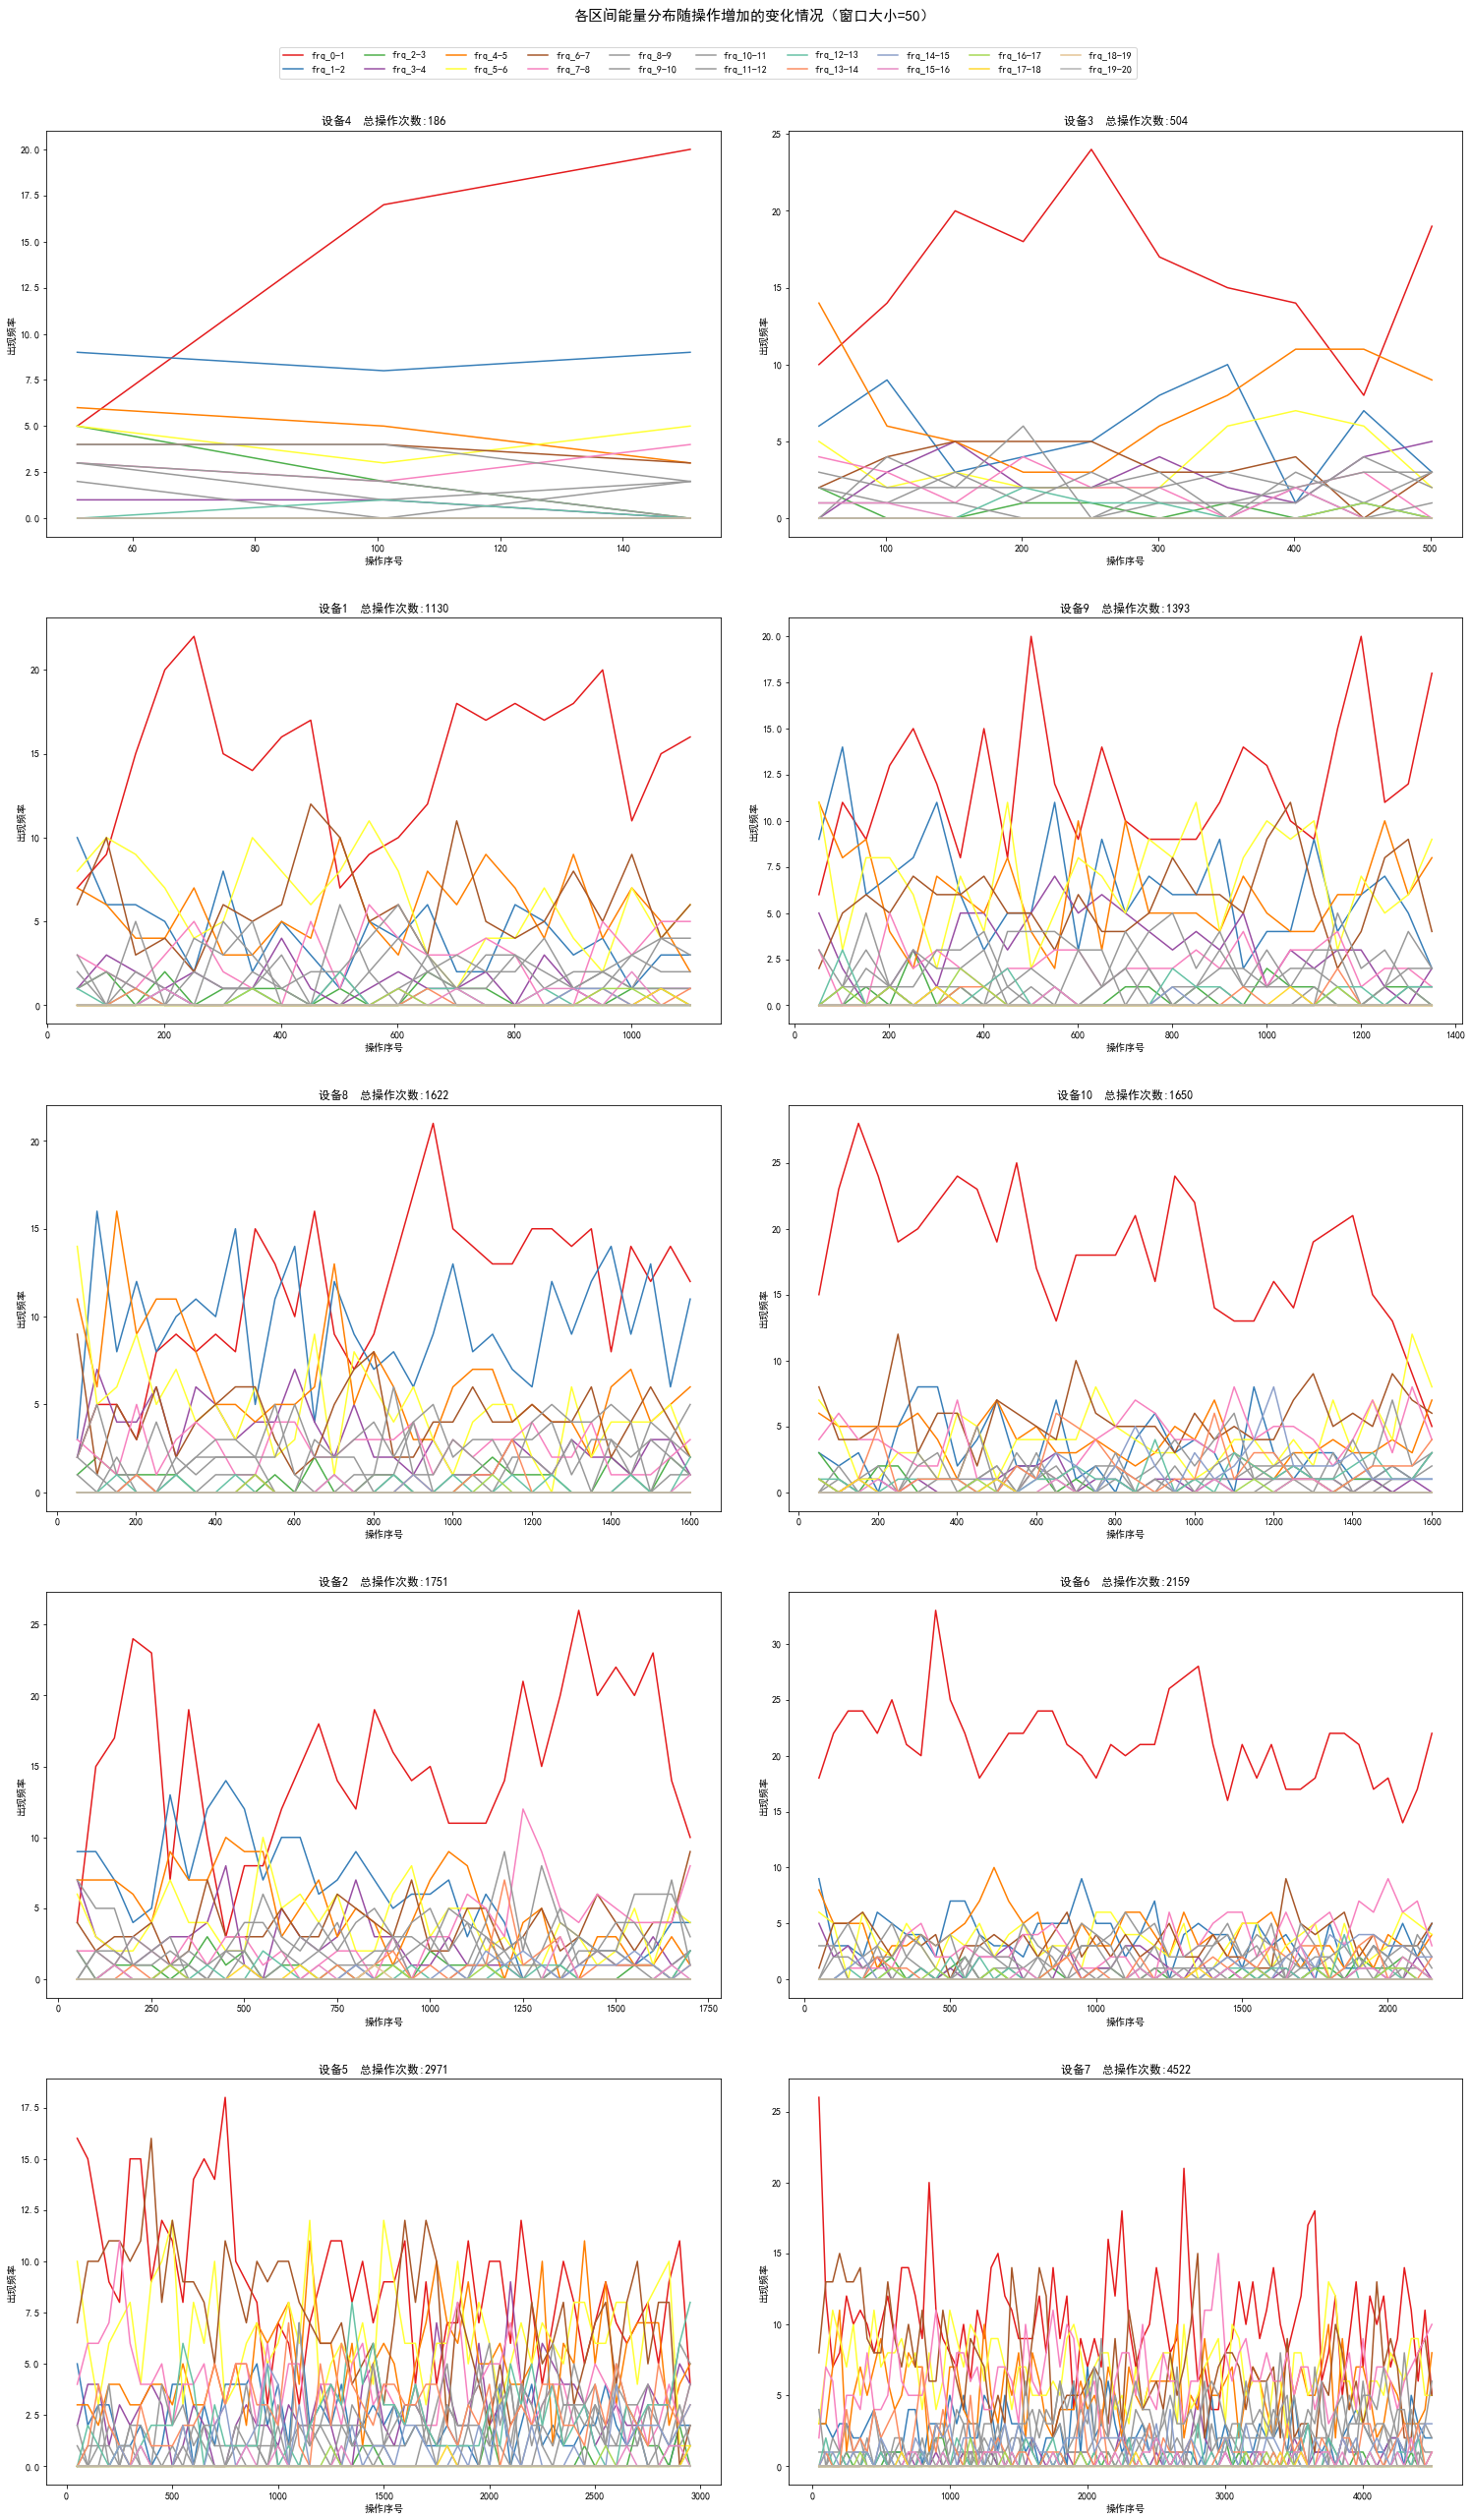

In [40]:
fig = plt.figure(figsize= (20, 35))
plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.2,wspace=0.1)
win_size = 50
title = '各区间能量分布随操作增加的变化情况（窗口大小=' + str(win_size) + '）'
fig.suptitle(title, y = 1,fontsize= 15)
for i, machine_tup in enumerate(machine_tot_operations_tup_list):
    machine_id, machine_tot_operations = machine_tup
    ax = fig.add_subplot(5, 2, i + 1)
    
    machine_ftr_df = machine_ftr_dict[machine_id]
    print(len(machine_ftr_df))
    energy_occ_df = energy_occ_dict[machine_id]
    #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
    machine_range = np.arange(1 + win_size, len(machine_ftr_df))
    for ci, z in enumerate(energy_occ_range_cnt):
        ys = (np.array(energy_occ_df.loc[machine_range][z]) - np.array(energy_occ_df.loc[machine_range - win_size][z]) ) #/ win_size
        n_colors = 9
        if ci < n_colors:
            tmp_c = plt.cm.Set1(ci)
        else:
            tmp_c = plt.cm.Set3(ci - n_colors) 
        ax.plot(machine_range, ys, c = tmp_c, marker = '.')
    ax.set_title('设备' + machine_id + '  总操作次数:' + str(machine_tot_operations))
    ax.set_xlabel('操作序号')
    ax.set_ylabel('出现频率')
    #plt.ylim([0, 0.6])
    #plt.xlim([win_size,400])
fig.legend(energy_occ_range_frq, loc = 'upper center', ncol = int(len(energy_occ_range_frq)/2), bbox_to_anchor=(0.35,1, 0.3, 0))#bbox_to_anchor=(0.45, 0.78),borderaxespad=1)
#plt.savefig(distribution_fig_path + title +'.png', dpi = 100, bbox_inches ='tight')

1
40


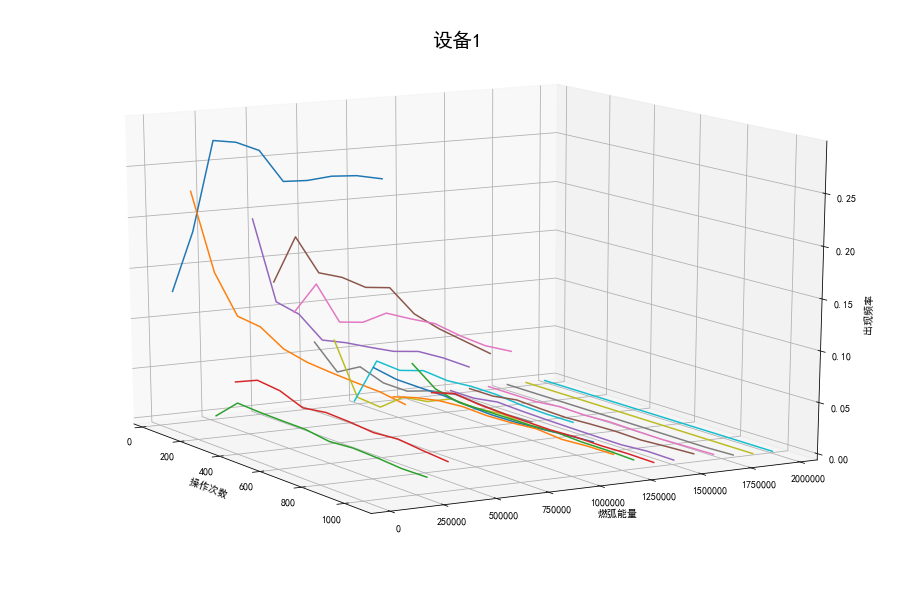

In [41]:
fig = plt.figure(figsize= (25, 40))
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
for i, machine_id in enumerate(list(machine_ftr_dict.keys())[:1]):
    print(machine_id)
    machine_ftr_df = machine_ftr_dict[machine_id]
    energy_occ_df = energy_occ_dict[machine_id]
    
    ax = fig.add_subplot(5, 2, i + 1, projection='3d')
    
    machine_range = np.arange(30, len(machine_ftr_df), int(len(machine_ftr_df)/10))
    # 绘制柱状图
    '''
    for operation_idx in machine_range:
        ys = energy_occ_df.loc[operation_idx][energy_occ_range_frq].tolist()
        ax.bar(energy_bar, ys, zs = operation_idx, zdir='x',alpha = 0.5, linewidth = 0, width = energy_bar[0])
    '''
    
    ax.view_init(15, -30)
    
    energy_occ_df = energy_occ_dict[machine_id]
    # 绘制折线图
    print(len(energy_occ_cols))
    for col_idx, z in enumerate(energy_occ_range_frq):
        ys = energy_occ_df.loc[machine_range][z].tolist()
        ax.plot(machine_range, ys, zs = energy_bar[col_idx], zdir='y')#,marker = '.')
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧能量')
    #ax.set_yticks(energy_occ_cols) #设置刻度
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + machine_id, fontsize=20)
    
    break
plt.show()

In [42]:
fig = plt.figure(figsize= (20, 35))
plt.subplots_adjust(top=0.95,bottom=0,left=0,right=1,hspace=0.2,wspace=0.1)
win_size = 100
title = '各区间能量分布随操作增加的变化情况（窗口大小=' + str(win_size) + '）'
fig.suptitle(title, y = 1,fontsize= 15)
for i, machine_tup in enumerate(machine_tot_operations_tup_list):
    machine_id, machine_tot_operations = machine_tup
    ax = fig.add_subplot(5, 2, i + 1)
    
    machine_ftr_df = machine_ftr_dict[machine_id]
    print(len(machine_ftr_df))
    energy_occ_df = energy_occ_dict[machine_id]
    #machine_range = np.arange(20, len(machine_ftr_df), int(len(machine_ftr_df)/150))
    machine_range = np.arange(1 + win_size, len(machine_ftr_df))
    for ci, z in enumerate(energy_occ_range_cnt):
        ys = (np.array(energy_occ_df.loc[machine_range][z]) - np.array(energy_occ_df.loc[machine_range - win_size][z]) ) #/ win_size
        n_colors = 12
        if ci < n_colors:
            tmp_c = plt.cm.Set1(ci)
        else:
            tmp_c = plt.cm.Set2(ci - n_colors) 
        ax.plot(machine_range, ys, c = tmp_c)
    ax.set_title('设备' + machine_id + '  总操作次数:' + str(machine_tot_operations))
    ax.set_xlabel('操作序号')
    ax.set_ylabel('出现频率')
    #plt.ylim([0, 0.6])
    #plt.xlim([win_size,400])
fig.legend(energy_occ_range_frq, loc = 'upper center', ncol = int(len(energy_occ_range_frq)/2), bbox_to_anchor=(0.35,1, 0.3, 0))#bbox_to_anchor=(0.45, 0.78),borderaxespad=1)
#plt.savefig(distribution_fig_path + title +'.png', dpi = 100, bbox_inches ='tight')

50000


In [100]:
# 累计
energy_max = max(machine_ftr_df['A_arcing_energy'])
energy_range = np.arange(0, energy_max + 0.1, int(energy_max / 10))
energy_range[-1] = energy_max + 0.1
print(energy_range)

energy_bar = []
for range_idx in range(len(energy_range) - 1):
    energy_bar += [int((energy_range[range_idx + 1] + energy_range[range_idx]) / 2)]
energy_bar

[      0.          120532.          241064.          361596.
  482128.          602660.          723192.          843724.
  964256.         1084788.         1205324.40449812]


[60266,
 180798,
 301330,
 421862,
 542394,
 662926,
 783458,
 903990,
 1024522,
 1145056]

In [135]:
3e3

3000.0

In [140]:
energy_range = np.arange(0, 3e6 + 1, 1e5)
energy_bar = []
for range_idx in range(len(energy_range) - 1):
    energy_bar += [int((energy_range[range_idx + 1] + energy_range[range_idx]) / 2)]
energy_bar

[50000,
 150000,
 250000,
 350000,
 450000,
 550000,
 650000,
 750000,
 850000,
 950000,
 1050000,
 1150000,
 1250000,
 1350000,
 1450000,
 1550000,
 1650000,
 1750000,
 1850000,
 1950000,
 2050000,
 2150000,
 2250000,
 2350000,
 2450000,
 2550000,
 2650000,
 2750000,
 2850000,
 2950000]

In [34]:
machine_ftr_df.shape

(186, 39)

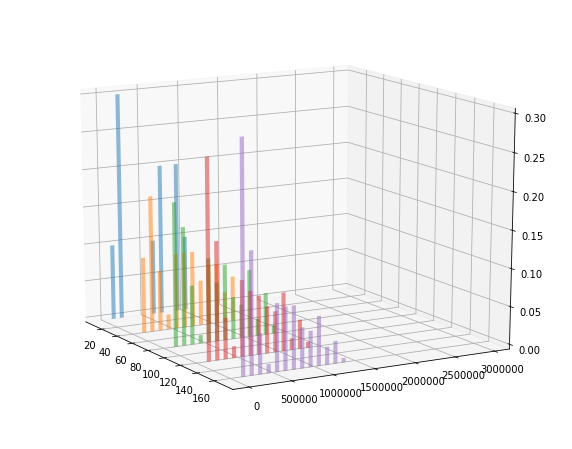

In [141]:
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for operation_idx in range(10, len(machine_ftr_df), 40):
    occ_times = []
    for range_idx in range(len(energy_range) - 1):
        occ_times += [machine_ftr_df[:operation_idx]['A_arcing_energy'][(machine_ftr_df['A_arcing_energy'] >= energy_range[range_idx]) & (machine_ftr_df['A_arcing_energy'] < energy_range[range_idx + 1])].count()]
    occ_frequency = occ_times / np.sum(occ_times)
    ax.bar(energy_bar, occ_frequency, zs = operation_idx, zdir='x',alpha = 0.5, linewidth = 0, width = energy_bar[0])
    ax.view_init(15, -30)
plt.show()

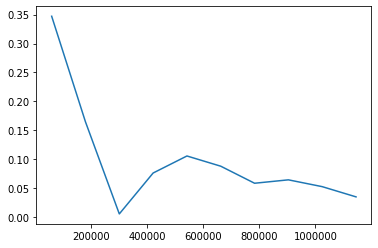

In [77]:
plt.plot(energy_bar, occ_frequency)

In [ ]:
fig = plt.figure(figsize= (20, 40))
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(n_clusters):
        xs = np.arange(30, len(machine_df), 10)
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.')

    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.view_init(15, -30)
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图1.png',dpi = 100)
plt.show()

In [6]:
machine_ftr_df[machine_ftr_df['A_arcing_energy'] == max(machine_ftr_df['A_arcing_energy'])]

A_arcing_start  A_arcing_end  A_arcing_duration  A_arcing_energy  \
1175            6327          6420                 97     8.754707e+06   

      A_arcing_electricity  A_arcing_power  A_phase_angle_degree  \
1175          3.636951e+06    89333.748102                 192.6   

      A_phase_angle_radian  A_phase_angle_start  A_phase_angle_end  ...  \
1175              3.361504                 6327               6420  ...   

      C_arcing_energy  C_arcing_electricity  C_arcing_power  \
1175     2.005417e+06          4.185630e+06    27853.009568   

      C_phase_angle_degree  C_phase_angle_radian  C_phase_angle_start  \
1175                 313.2              5.466371                 6328   

      C_phase_angle_end  C_touch_U   C_touch_I  C_touch_R  
1175               6354   3.894421  321.513779   0.012112  

[1 rows x 39 columns]

In [7]:
machine_ftr_df.shape

(1622, 39)

In [8]:
processed_data_path = root_data_path + '1_processed_data/'
src_data_path = processed_data_path + '2_smoothed_data/'
pkl_file = open(src_data_path + '8.pkl', 'rb')
operation_data_list = pickle.load(pkl_file)
pkl_file.close()

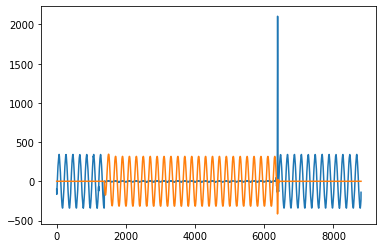

In [10]:
tmp_df = operation_data_list[1175]
plt.plot(tmp_df['UA'])
plt.plot(tmp_df['IA'])

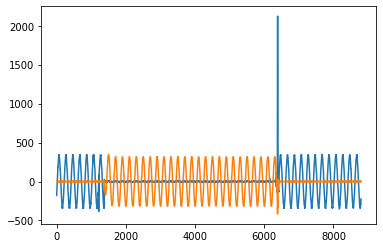

In [11]:
processed_data_path = root_data_path + '1_processed_data/'
src_data_path = processed_data_path + '1_pickle_data/'
pkl_file = open(src_data_path + '8.pkl', 'rb')
operation_data_list = pickle.load(pkl_file)
pkl_file.close()
tmp_df = operation_data_list[1175]
plt.plot(tmp_df['UA'])
plt.plot(tmp_df['IA'])